In [14]:
from tweepy import Stream
from tweepy import OAuthHandlerimport os 
dir_path = os.path.dirname(os.path.realpath(__file__))
from tweepy.streaming import StreamListener
import json
import pandas as pd
import numpy as np
import seaborn as sns
import indicoio
indicoio.config.api_key = ''


In [20]:
import os 
os.getcwd()

'/home/michael'

In [123]:
#consumer key, consumer secret, access token, access secret.
ckey="mwfdRgtTtQvwCkBBHBgGPuWp6"
csecret="T33E1KAEnAfvoVvUN38nRlpbJxwhUugmklb2cZvsjPgHNZ6TWQ"
atoken="59560435-sBe0DV3AhazjzhrSWeHBjv88FdItCOUDnThvgHvuM"
asecret="6OqH5aHPnJIjh2XovsvcEh13h8s050fkW4E4sq9oCCm03"


class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)
        tweet = all_data["text"].encode("utf-8")
        sentimentRating = str(indicoio.sentiment(tweet))
        print(sentimentRating)
        saveMe =sentimentRating
        
        datafile_id = open("sentiment.csv", "a")
        datafile_id_2 = open("tweets.csv", "a")
        #here is your data, in two numpy arrays

        data = np.array([sentimentRating])
        data = data.T
        data2 = np.array([tweet])
        data2 = data2.T
        #here you transpose your data, so to have it in two columns

        np.savetxt(datafile_id, data, fmt=['%s'])
        np.savetxt(datafile_id_2, data2, fmt=['%s'])
        #here the ascii file is populated. 

        datafile_id.close()
        datafile_id_2.close()
        
        
        

        return(True)

    def on_error(self, status):
        print status

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())





In [124]:
twitterStream.filter(track=["Trump"],async=True)



0.3708643169
0.5658273352
0.3498234237
0.0133673918
0.0868868387
0.74500974
0.0468760784
0.0624832181
0.2640982402
0.9831462729
0.7493504695
0.3221148095
0.4564379964
0.0227916425
0.6777172227
0.7154957232
0.0227916425
0.1388039758
0.7951803867
0.5111533462
0.1714898921
0.6998740661
0.7160174122
0.4544904105
0.2089037949
0.0268450452
0.639447319
0.2047108222
0.1417808007
0.1518014888
0.7104967049
0.3800378761
0.3318980828
0.8293872291
0.2404856449
0.2500128247
0.0536314487
0.1960267303
0.4392533005
0.2853219857
0.3090248923
0.2089037949
0.6421757142
0.3365848263
0.2117267858
0.6246058421
0.933207392
0.7768032255
0.1387780142
0.1944803682


Exception in thread Thread-33:
Traceback (most recent call last):
  File "/home/michael/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/michael/anaconda2/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/michael/anaconda2/lib/python2.7/site-packages/tweepy/streaming.py", line 294, in _run
    raise exception
KeyError: 'text'



In [125]:
sentiment_data=pd.read_csv("sentiment.csv",sep=",",error_bad_lines=False,names=["Score"])
tweet_data=pd.read_csv("tweets.csv",sep="\t",error_bad_lines=False,names=["Tweet"])


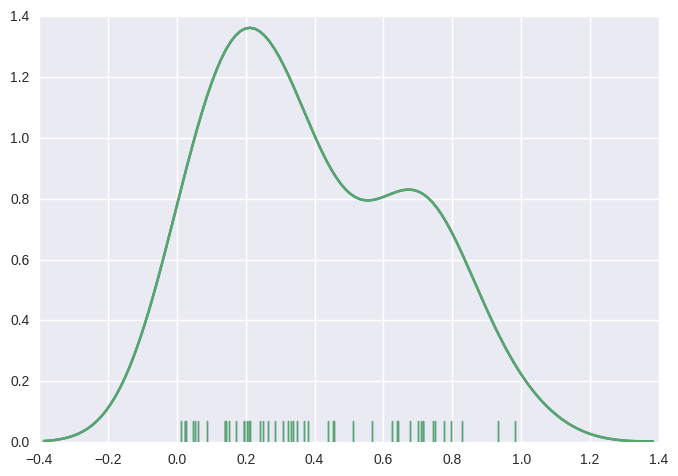

In [134]:
sns.distplot(sentiment_data,hist=False, rug=True)
sns.plt.show()

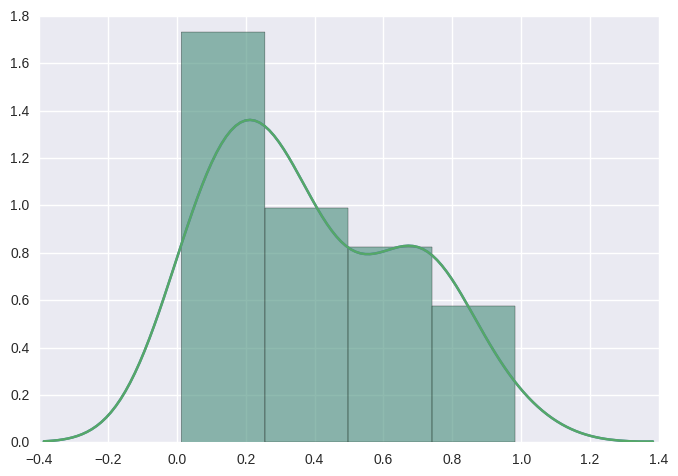

In [131]:

historical_sen=pd.read_csv("Historical_sentiment.csv",header=0)
historical_sen=historical_sen.append(sentiment_data)
historical_sen.to_csv("Historical_sentiment.csv",header=0)


    

In [132]:
historical_sen.head()

,Score,Sentiment
0,0.370864,NaN
1,0.565827,NaN
2,0.349823,NaN
3,0.013367,NaN
4,0.086887,NaN
